## Logistic Regression

Unlike linear regression, logistic regression is used to classify data. Classifying means when your output or target variable is categorical value. It is used specially in case of binary ctegorical value, which means categorical values with two kinds of values like Yes-No, 1-0, True-False.

In case of linear regression we get straight line, but in case of logistic regression we get a sigmoid curve. Logistic regression is a variation of linear regression, which convert your -infinity to +infinity values to 0 or 1. Win case means 1 and 0 case means. 
It set a threshold value. If your value is greater than or equal to threshold value, then output will be 1 otherwise 0. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['diabetes.csv']


## Read Data

In [2]:
df = pd.read_csv("../input/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Problem Set

We have data for different patient and we need to calculate the outcome which is whether our patient has diabetes or not?

In [4]:
# Type of glass
df.Outcome.value_counts() # There are 500 patient with no diabetes(0) and 268 with diabetes.

0    500
1    268
Name: Outcome, dtype: int64

## Lets do it with Logistic Regressor Classifier

## Split Data into Train & Test Set

In [5]:
# Split data into test and train
from sklearn.model_selection import train_test_split

In [6]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure',  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Dependent Variable
X = df[col_names]

In [9]:
# Independent Variable
y = df.Outcome

In [10]:
# Splitting data into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


## Create Logistic Object

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
clf = LogisticRegression(random_state=0)

## Train Your Classifier

In [14]:
clf.fit(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict The Outcome

In [15]:
y_pred = clf.predict(X_test)

In [16]:
y_pred # predicted values

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

## Model Evaluation - Accuacy & Prediction

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score


In [18]:
cnf_matrix = confusion_matrix(y_pred, y_test) # Confusion Matrix

In [19]:
cnf_matrix

array([[117,  29],
       [ 13,  33]])

## Plot Confusion Matrix

Text(0.5, 510.88, 'Predicted label')

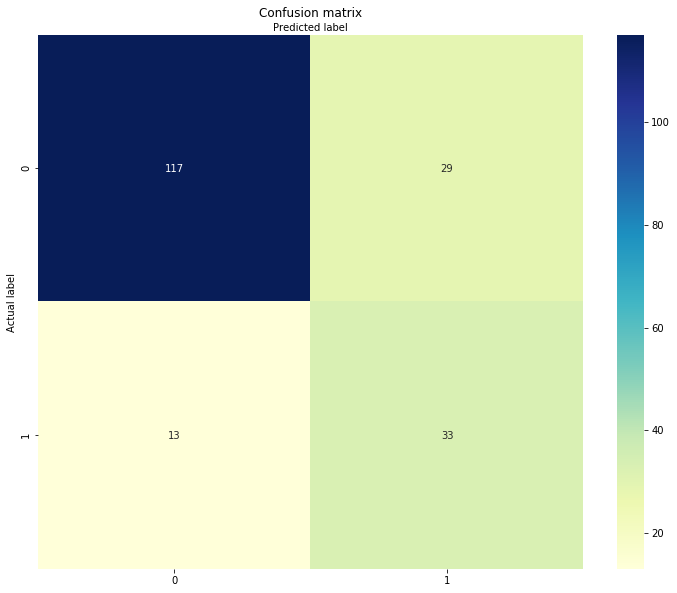

In [20]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))

Accuracy: 0.78125
Precision: 0.717391304347826


In [22]:
## Thank You